In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline

In [2]:
# read in data
#raw_loan_data = pd.read_csv('loan.csv')
#raw_loan_data.shape

In [3]:
# filter for relevant columns
#relevant_cols = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'issue_d', 'dti', 'revol_bal', 'total_pymnt', 'loan_status']
# save filtered data to avoid reading large raw data file again
#raw_loan_data[relevant_cols].to_csv('filtered_loan_data.csv', index = False)

In [4]:
# read in filtered data
filtered_loan_data = pd.read_csv('filtered_loan_data.csv')

In [5]:
# sanity check that number of rows has remained constant in filtering
filtered_loan_data.shape

(2260668, 11)

# Part 1: Data Exploration and Evaluation

Part 1 consists of three sections:

#### Section 1A: Handling Missing Values
#### Section 1B: Cleaning Categorical Variables
#### Section 1C: Managing Outliers for Numerical Variables
#### Section 1D: Visualizing Cleaned Data

#### Section 1A: Handling Missing Values

In [6]:
# preview filtered data
filtered_loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,2500,2500,36 months,13.56,C,55000.0,Dec-2018,18.24,4341,167.02,Current
1,30000,30000,60 months,18.94,D,90000.0,Dec-2018,26.52,12315,1507.11,Current
2,5000,5000,36 months,17.97,D,59280.0,Dec-2018,10.51,4599,353.89,Current
3,4000,4000,36 months,18.94,D,92000.0,Dec-2018,16.74,5468,286.71,Current
4,30000,30000,60 months,16.14,C,57250.0,Dec-2018,26.35,829,1423.21,Current


In [7]:
# count of values by variable
filtered_loan_data.count()

loan_amnt      2260668
funded_amnt    2260668
term           2260668
int_rate       2260668
grade          2260668
annual_inc     2260664
issue_d        2260668
dti            2258957
revol_bal      2260668
total_pymnt    2260668
loan_status    2260668
dtype: int64

In [8]:
# a version of our dataset with no missing values
filtered_loan_data_no_missing = filtered_loan_data.dropna()
filtered_loan_data_no_missing.shape

(2258953, 11)

In [9]:
# missing values are less than 0.1% of data
(filtered_loan_data.shape[0] - filtered_loan_data_no_missing.shape[0]) / filtered_loan_data.shape[0] * 100

0.0758625326673355

Given the very low incidence (< 0.1%) of missing values, we can exclude them from the analysis. If missing values were of higher incidence, then we could impute them using a means or regression method.

#### Section 1B: Cleaning Categorical Variables

In [23]:
numerical_vars = filtered_loan_data_no_missing._get_numeric_data().columns.values
categorical_vars = list(filtered_loan_data_no_missing.columns.difference(numerical_vars))
categorical_vars

['grade', 'issue_d', 'loan_status', 'term']

In [30]:
# summary statistics on categorical variables
filtered_loan_data_no_missing[categorical_vars].describe()

,grade,issue_d,loan_status,term
count,2258953,2258953,2258953,2258953
unique,7,139,9,2
top,B,Mar-2016,Fully Paid,36 months
freq,663120,61979,1041702,1608745


The above summary statistics table suggests that grade, loan status and term are good candidates for conversion to dummy variables (given their relatively small number of unique values) while issue date is not (139 unique values). 

Issue date needs to be coded to capture the information its conveying, an indicator of months since origination.

In [40]:
# code grade, loan status and term as dummies
filtered_loan_data_cat_fix_1 = pd.get_dummies(filtered_loan_data_no_missing, columns = ['grade', 'loan_status', 'term'], drop_first = True)

In [41]:
filtered_loan_data_cat_fix_1.columns.values

array(['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'issue_d',
       'dti', 'revol_bal', 'total_pymnt', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'loan_status_Current',
       'loan_status_Default',
       'loan_status_Does not meet the credit policy. Status:Charged Off',
       'loan_status_Does not meet the credit policy. Status:Fully Paid',
       'loan_status_Fully Paid', 'loan_status_In Grace Period',
       'loan_status_Late (16-30 days)', 'loan_status_Late (31-120 days)',
       'term_ 60 months'], dtype=object)

In [44]:
#filtered_loan_data_cat_fix_1[

['Dec-2018',
 'Nov-2018',
 'Oct-2018',
 'Sep-2018',
 'Aug-2018',
 'Jul-2018',
 'Jun-2018',
 'May-2018',
 'Apr-2018',
 'Mar-2018',
 'Feb-2018',
 'Jan-2018',
 'Sep-2016',
 'Aug-2016',
 'Jul-2016',
 'Jun-2016',
 'May-2016',
 'Apr-2016',
 'Mar-2016',
 'Feb-2016',
 'Jan-2016',
 'Dec-2016',
 'Nov-2016',
 'Oct-2016',
 'Dec-2015',
 'Nov-2015',
 'Oct-2015',
 'Sep-2015',
 'Aug-2015',
 'Jul-2015',
 'Jun-2015',
 'May-2015',
 'Apr-2015',
 'Mar-2015',
 'Feb-2015',
 'Jan-2015',
 'Mar-2017',
 'Feb-2017',
 'Jan-2017',
 'Sep-2017',
 'Aug-2017',
 'Jul-2017',
 'Jun-2017',
 'May-2017',
 'Apr-2017',
 'Dec-2013',
 'Nov-2013',
 'Oct-2013',
 'Sep-2013',
 'Aug-2013',
 'Jul-2013',
 'Jun-2013',
 'May-2013',
 'Apr-2013',
 'Mar-2013',
 'Feb-2013',
 'Jan-2013',
 'Dec-2012',
 'Nov-2012',
 'Oct-2012',
 'Sep-2012',
 'Aug-2012',
 'Jul-2012',
 'Jun-2012',
 'May-2012',
 'Apr-2012',
 'Mar-2012',
 'Feb-2012',
 'Jan-2012',
 'Dec-2014',
 'Nov-2014',
 'Oct-2014',
 'Sep-2014',
 'Aug-2014',
 'Jul-2014',
 'Jun-2014',
 'May-2014',

In [ ]:
# summary

In [19]:
Loan_data_with_dummies = pd.get_dummies(filtered_loan_data_no_missing)

In [20]:
Loan_data_with_dummies.head()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt,term_ 36 months,term_ 60 months,grade_A,...,issue_d_Sep-2018,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,2500,2500,13.56,55000.0,18.24,4341,167.02,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,30000,30000,18.94,90000.0,26.52,12315,1507.11,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,5000,5000,17.97,59280.0,10.51,4599,353.89,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4000,4000,18.94,92000.0,16.74,5468,286.71,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,30000,30000,16.14,57250.0,26.35,829,1423.21,0,1,0,...,0,0,1,0,0,0,0,0,0,0


#### Part 1B: Univariate summary statistics and distributions

In [14]:
# summary statistics of numerical variables
filtered_loan_data_no_missing.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,2.25895e+06,2.25895e+06,2.25895e+06,2.25895e+06,2.25895e+06,2.25895e+06,2.25895e+06
mean,15043.9,15038.6,13.0921,78051.5,18.8242,16658.9,11827.2
std,9188.07,9186.24,4.83136,112718,14.1833,22945.4,9890.39
min,500,500,5.31,0,-1,0,0
25%,8000,8000,9.49,46000,11.89,5951,4274.47
50%,12900,12850,12.62,65000,17.84,11325,9065.12
75%,20000,20000,15.99,93000,24.49,20247,16712.6
max,40000,40000,30.99,1.1e+08,999,2.90484e+06,63296.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C68C10E748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C68C9A6400>]], dtype=object)

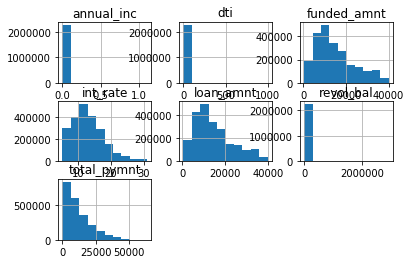

In [16]:
# distribution of numeric variables
filtered_loan_data_no_missing.hist()

In [33]:
# tabulation of categorical variables

Check and clean prior to processing:
1. Check for missing values
3. Code categorical variables as dummies
2. Identify and address outliers for numerical variables

#### Data Cleaning Step 2: Identify and remove outliers for numeric variables

#### Data Cleaning Step 1: Identify and remove outliers for numeric variables

In [18]:
# check that data types were read as expected
filtered_loan_data_no_missing.dtypes

loan_amnt        int64
funded_amnt      int64
term            object
int_rate       float64
grade           object
annual_inc     float64
issue_d         object
dti            float64
revol_bal        int64
total_pymnt    float64
loan_status     object
dtype: object

In [19]:
numerical_vars = filtered_loan_data_no_missing._get_numeric_data().columns.values
numerical_vars

array(['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti',
       'revol_bal', 'total_pymnt'], dtype=object)

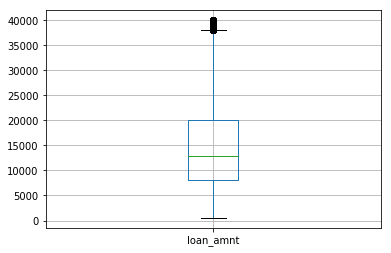

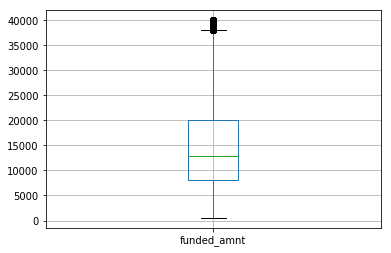

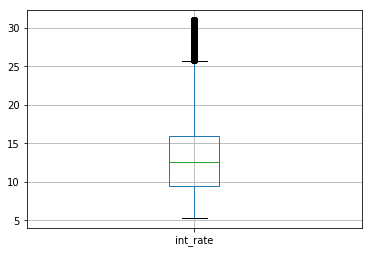

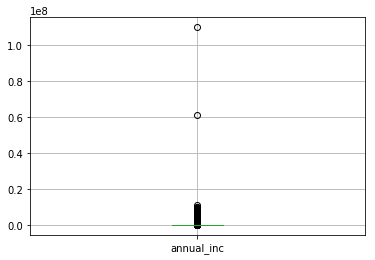

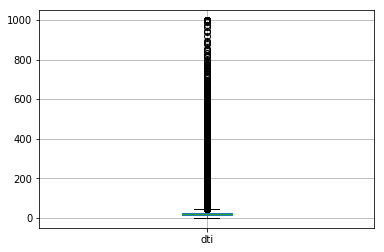

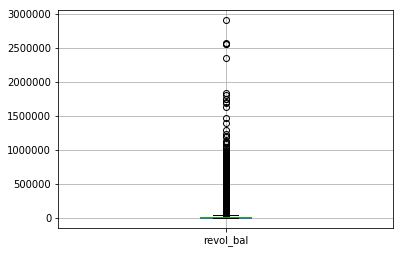

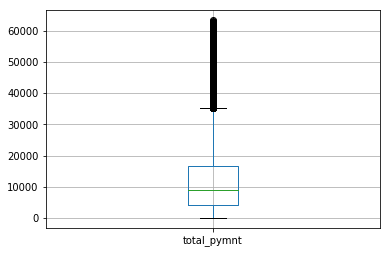

In [20]:
# let's visualize our the numeric variables as box plots to gauge the incidence of outliers
for column in filtered_loan_data_no_missing[numerical_vars]:
    plt.figure()
    filtered_loan_data_no_missing.boxplot([column])


The picture above shows the highest incidence of outliers in revolving balance, dti, annual income and total payment. This result is logical in that these variables are most sensitive to individual customer situations and are thus most impacted by outlier customers

In [25]:
# remove outliers
filtered_loan_data_no_outliers = filtered_loan_data_no_missing.copy()
for col in numerical_vars:
    Q1 = filtered_loan_data_no_outliers[col].quantile(0.25)
    Q3 = filtered_loan_data_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    filtered_loan_data_no_outliers = filtered_loan_data_no_outliers[(filtered_loan_data_no_outliers[col] >= (Q1-1.5*IQR)) & (filtered_loan_data_no_outliers[col] <= (Q3+1.5*IQR))] 

In [26]:
# removing outliers
filtered_loan_data_no_outliers.shape[0]

(1886933, 11)

In [29]:
# droping observations with outliers removes ~ 16% of the data
(filtered_loan_data_no_missing.shape[0] - filtered_loan_data_no_outliers.shape[0]) / filtered_loan_data_no_missing.shape[0] * 100

16.468691469012413

#### Data Cleaning Step 1: Coding categorical variables as dummy variables for analysis

In [6]:
# preview filtered data
filtered_loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,2500,2500,36 months,13.56,C,55000.0,Dec-2018,18.24,4341,167.02,Current
1,30000,30000,60 months,18.94,D,90000.0,Dec-2018,26.52,12315,1507.11,Current
2,5000,5000,36 months,17.97,D,59280.0,Dec-2018,10.51,4599,353.89,Current
3,4000,4000,36 months,18.94,D,92000.0,Dec-2018,16.74,5468,286.71,Current
4,30000,30000,60 months,16.14,C,57250.0,Dec-2018,26.35,829,1423.21,Current


In [23]:
# identify categorical variables
categorical_columns = list(filtered_loan_data.columns.difference(filtered_loan_data._get_numeric_data().columns.values))
categorical_columns

['grade', 'issue_d', 'loan_status', 'term']

In [15]:
filtered_loan_data._get_numeric_data().columns.values

TypeError: bad operand type for unary ~: 'str'

In [10]:
# quick summary statistics
filtered_loan_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,2.26067e+06,2.26067e+06,2.26067e+06,2.26066e+06,2.25896e+06,2.26067e+06,2.26067e+06
mean,15046.9,15041.7,13.0929,77992.4,18.8242,16658.5,11824
std,9190.25,9188.41,4.83211,112696,14.1833,22948.3,9889.6
min,500,500,5.31,0,-1,0,0
25%,8000,8000,9.49,46000,11.89,5950,4272.58
50%,12900,12875,12.62,65000,17.84,11324,9060.87
75%,20000,20000,15.99,93000,24.49,20246,16708
max,40000,40000,30.99,1.1e+08,999,2.90484e+06,63296.9
